<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/Deep_Learning/sgd_vs_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/DeepLearningML/8_sgd_vs_gd/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [7]:
df.shape

(20, 3)

In [8]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop(['price'],axis='columns'))
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

# (1) Batch Gradient Descent Implementation

In [15]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[1]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w,X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500,0.01)
w,b,cost

(array([0.75550442, 0.41573953]), -0.11682769564715854, 0.0034268126227234427)

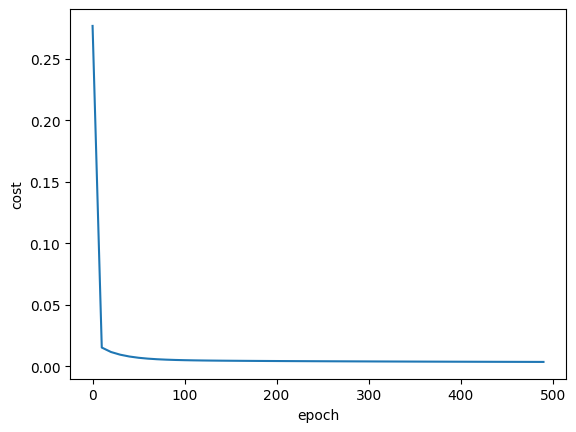

In [16]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [18]:
def predict(area,bedrooms,w,b):
  scaled_X = sx.transform([[area,bedrooms]])[0]
  scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


121.6279485426776

In [19]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


37.293476976103996

In [20]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


68.9097028119826

# (2) Stochastic Gradient Descent Implementation

In [23]:
import random
random.randint(0,6)

5

In [25]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_X = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w,sample_X.T) + b

    w_grad = -(2/total_samples)*(sample_X.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate*w_grad
    b = b - learning_rate*b_grad

    cost = np.square(sample_y-y_predicted)

    if i%100==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000,0.01)
w_sgd,b_sgd,cost_sgd

(array([0.70517104, 0.67375843]), -0.22814466763781951, 0.002486602543388269)

In [26]:
w,b

(array([0.75550442, 0.41573953]), -0.11682769564715854)

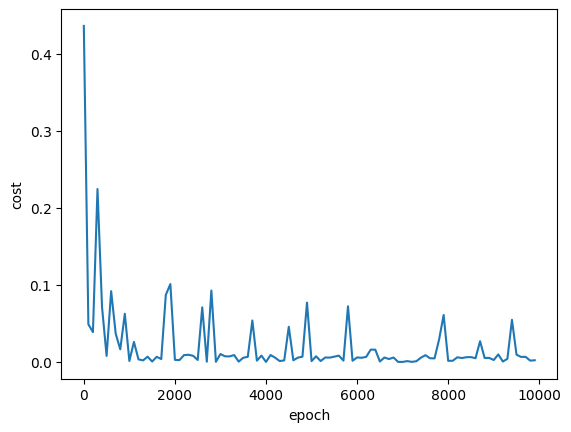

In [28]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [30]:
predict(2600,4,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.50698027014212

In [31]:
predict(1000,2,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.505202306189982

In [32]:
predict(1500,3,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.65801301582583

# (3) Mini Batch Gradient Descent Implementation

In [41]:
np.random.permutation(20)

array([18, 12,  1, 10, 19, 15, 11,  3, 14,  0, 17,  8,  6,  7, 16,  2,  9,
        4,  5, 13])

In [35]:
def mini_batch_gradient_descent(X,y_true,epochs=100,batch_size=5,learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]
  if batch_size>total_samples:
    batch_size = total_samples

  num_batches = int(total_samples/batch_size)
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    X_tmp = X[random_indices]
    y_tmp = y_true[random_indices]

    for j in range(0,total_samples,batch_size):
      Xj = X_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]
      y_predicted = np.dot(w,Xj.T) + b

      w_grad = -(2/(len(Xj)))*(Xj.T.dot(yj-y_predicted))
      b_grad = -(2/(len(yj)))*np.sum(yj-y_predicted)

      w = w - learning_rate*w_grad
      b = b - learning_rate*b_grad

      cost = np.mean(np.square(yj-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost



(array([0.70997876, 0.67807748]), -0.2332573050888412, 0.0021734358911808917)

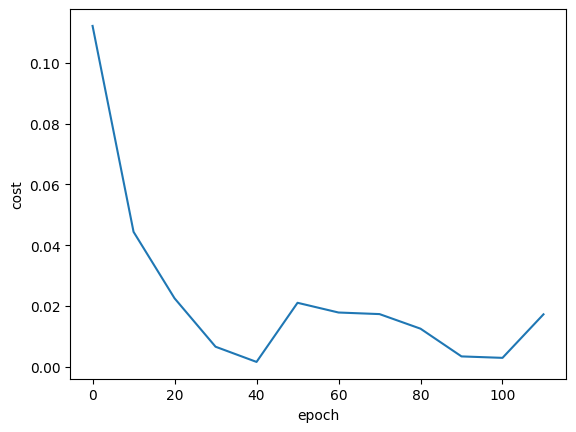

In [36]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [38]:
predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.65693190249485

In [39]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.00552576135308

In [40]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.41600827081184